<center>
<img src="./github/banner.jpeg" width="600px"/>

---
# Análise Exploratória de Dados Espaciais com Python
## X Escola Regional de Computação Ceará, Maranhão e Piauí  - ERCEMAPI 2022

</center>

---

__Conteúdo:__

- Dados Espaciais
- Matrizes de Ponderação Espacial
- Mapas coropléticos
- Autocorrelação Espacial Global
- Autocorrelação Espacial Local

## **Ferramentas e bibliotecas**
<br>
<br>
<center>
    <figure>
        <img src="./github/tools.png" width=80%/>
        <figcaption>Figura 1 - Ferramentas a serem utilizadas.</figcaption>
    </figure>
</center>

* [Google Colab ](https://colab.research.google.com/): serviço de nuvem gratuito hospedado pelo Google para incentivar a pesquisa de Aprendizado de Máquina e Inteligência Artificial;




### Referências de apoio:

* [pandas](https://pandas.pydata.org/docs/getting_started/index.html#getting-started) é uma biblioteca para análise de dados em Python, de código aberto, licenciada por BSD, utiliza o conceito de dataframes que funcionam como uma matriz de dados, formada por linhas e colunas.

* Documentação da biblioteca [matplotlib](https://matplotlib.org/).

* Ciência de Dados com Reprodutibilidade usando Jupyter, disponível: https://doi.org/10.5753/sbc.6757.3.1

* Introdução a análise de dados com python e pandas, disponívei em: http://www.enucomp.com.br/2017/enucomp_anaisX_2017.pdf

* Introdução à Análise Exploratória de Dados com Python, disponível em https://ercas2019.enucompi.com.br/doc/livro_de_minicursos_ercas_pi_2019.pdf

* Introdução à Análise de Dados Geoespaciais com Python, disponível em https://sol.sbc.org.br/livros/index.php/sbc/catalog/download/76/325/581-1?inline=1


## PySAL

Biblioteca multiplataforma de código aberto para ciência de dados geoespaciais com ênfase em dados vetoriais escrita em Python.

$\textit{Pysal}$ suporta o desenvolvimento de aplicações de alto nível para análise espacial, como:


- detecção de $\textit{clusters}$ espaciais, $\textit{hot-spots}$ e $\textit{outliers}$;
- construção de gráficos a partir de dados espaciai;
- análise exploratória de dados espaço-temporais, dentre outras funcionalidades.

Na Figura a seguir é apresentada uma visão geral dos principais componentes do $\textit{PySAL}$. Ela está organizado em seis categorias principais de funcionalidade que lidam com operações básicas de dados, como a construção e manipulação de pesos espaciais e funções essenciais de geometria computacional, exploração de dados como métodos de agrupamento e análise exploratória de dados espaciais, e modelagem espacial, como dinâmica espacial e econometria espacial.


<br>
<br>
<center>
    <figure>
        <img src="./github/pysal.jpg" width=40%/>
        <figcaption>Figura 2 - Componentes do $PySal$.</figcaption>
    </figure>
</center>

## Bibliotecas necessárias

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os

import numpy as np
import pandas as pd
import geopandas as gpd

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data_path = 'data'

In [4]:
os.listdir(data_path)

['k_means.tif',
 'caso_full.csv.gz',
 'casos_dengue_2019_sao_carlos.geojson',
 'sp_setores_censitarios.zip']

## Dados Espaciais

In [5]:
# Visualizando dados em Raster

import PIL
from PIL import Image

In [6]:
raster_data = Image.open(
    os.path.join(data_path, 'k_means.tif')
)

In [8]:
raster_array = np.asarray(raster_data)

In [9]:
type(raster_array)

numpy.ndarray

In [10]:
raster_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [11]:
raster_array.shape

(5798, 3778)

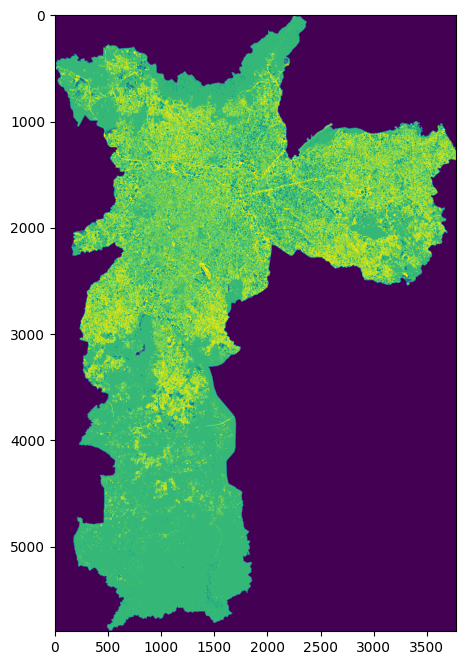

In [13]:
plt.figure(figsize=(16,8))
plt.imshow(raster_array)

In [14]:
setores_censitarios_sp = gpd.read_file(
    os.path.join(data_path, 'sp_setores_censitarios.zip')
)
setores_censitarios_sp.head()

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry
0,98237.0,354100005000009,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,1,"POLYGON ((-46.41024 -24.01103, -46.41169 -24.0..."
1,98232.0,354100005000004,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,2,"POLYGON ((-46.41606 -24.00245, -46.41598 -24.0..."
2,98230.0,354100005000002,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,3,"POLYGON ((-46.41213 -24.00792, -46.41244 -24.0..."
3,98229.0,354100005000001,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,4,"POLYGON ((-46.41134 -24.00552, -46.41196 -24.0..."
4,98231.0,354100005000003,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,5,"POLYGON ((-46.41326 -24.00514, -46.41484 -24.0..."


In [15]:
setores_censitarios_sp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 68296 entries, 0 to 68295
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ID          68296 non-null  float64 
 1   CD_GEOCODI  68296 non-null  object  
 2   TIPO        68296 non-null  object  
 3   CD_GEOCODS  68296 non-null  object  
 4   NM_SUBDIST  0 non-null      object  
 5   CD_GEOCODD  68296 non-null  object  
 6   NM_DISTRIT  68296 non-null  object  
 7   CD_GEOCODM  68296 non-null  object  
 8   NM_MUNICIP  68296 non-null  object  
 9   NM_MICRO    68296 non-null  object  
 10  NM_MESO     68296 non-null  object  
 11  CD_GEOCODB  18797 non-null  object  
 12  NM_BAIRRO   18797 non-null  object  
 13  ID1         68296 non-null  int64   
 14  geometry    68296 non-null  geometry
dtypes: float64(1), geometry(1), int64(1), object(12)
memory usage: 7.8+ MB


<AxesSubplot:>

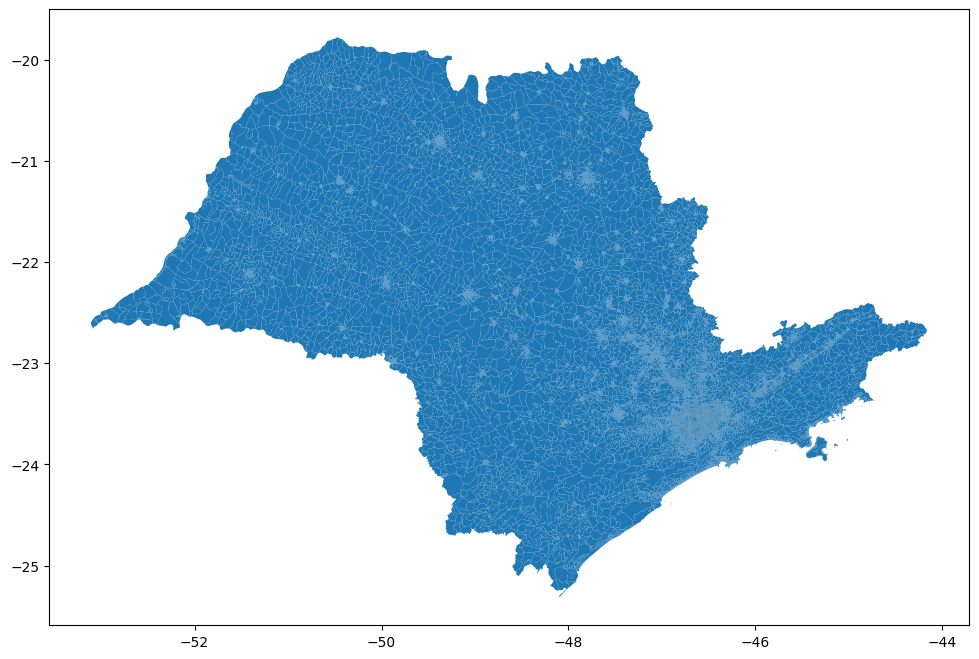

In [16]:
setores_censitarios_sp.plot(
    figsize=(16,8)
)

<AxesSubplot:>

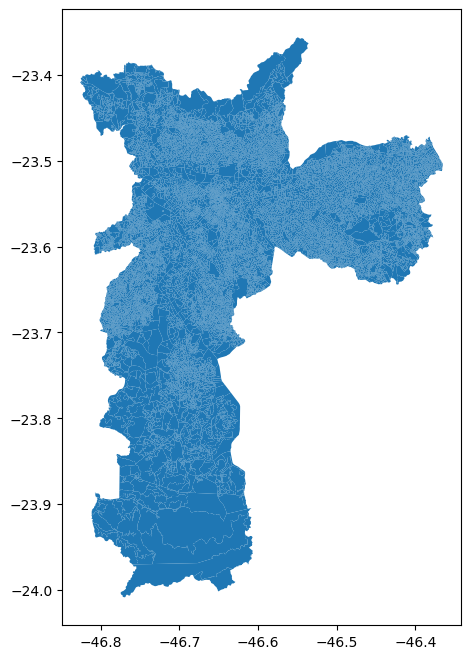

In [17]:
setores_censitarios_sp_capital = setores_censitarios_sp.query(
    'NM_MUNICIP == "SÃO PAULO"'
)
setores_censitarios_sp_capital.plot(figsize=(16,8))

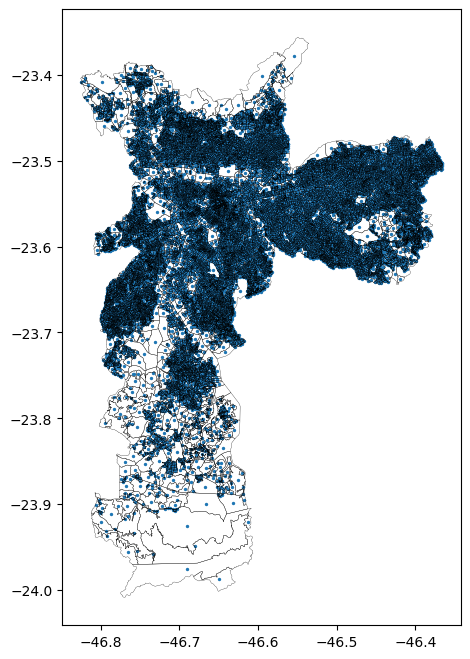

In [19]:
setores_censitarios_sp_capital['centroid'] = setores_censitarios_sp_capital.geometry.centroid

# Plot centroids
ax = setores_censitarios_sp_capital.set_geometry(
    'centroid'
).plot(markersize=2,figsize=(16,8))

setores_censitarios_sp_capital.plot(
    ax=ax, 
    facecolor='none', 
    edgecolor='k', 
    linewidth=.2,
);

## Matrizes de Ponderação Espacial

In [20]:
from pysal.lib import weights
from shapely.geometry import Polygon

In [21]:
# Get points in a grid
l = np.arange(3)
xs, ys = np.meshgrid(l, l)
# Set up store
polys = []
# Generate polygons
for x, y in zip(xs.flatten(), ys.flatten()):
    poly = Polygon([(x, y), (x+1, y), (x+1, y+1), (x, y+1)])
    polys.append(poly)
# Convert to GeoSeries
polys = gpd.GeoSeries(polys)
gdf = gpd.GeoDataFrame(
    {
        'geometry': polys, 
        'id': ['P-%s'%str(i).zfill(2) for i in range(len(polys))]
    }
)

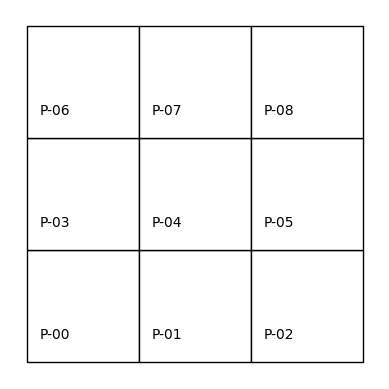

In [22]:
# Plot grid geotable
ax = gdf.plot(facecolor='w', edgecolor='k')

# Loop over each cell and add the text
for x, y, t in zip(
    [p.centroid.x-.25 for p in polys],
    [p.centroid.y-.25 for p in polys],
    [i for i in gdf['id']]
):
    plt.text(
        x, y, t, verticalalignment='center', horizontalalignment='center'
    )
    
# Remove axes
ax.set_axis_off()
plt.show()

### ROOK

In [23]:
w_rook = weights.contiguity.Rook.from_dataframe(gdf)

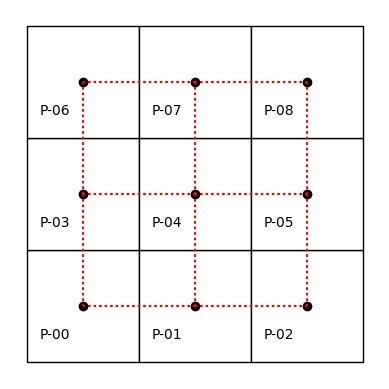

In [27]:
# Set up figure
f,ax = plt.subplots(1,1, subplot_kw=dict(aspect='equal'))
# Plot grid
gdf.plot(facecolor='w', edgecolor='k', ax=ax)
# Loop over each cell and add the text
for x, y, t in zip(
    [p.centroid.x-.25 for p in polys],
    [p.centroid.y-.25 for p in polys],
    [i for i in gdf['id']]
):
    plt.text(
        x, y, t, verticalalignment='center', horizontalalignment='center'
    )
# Plot weights connectivity
w_rook.plot(gdf, edge_kws=dict(color='r', linestyle=':'), ax =ax)
# Remove axes
ax.set_axis_off()

### QUEEN

In [28]:
w_queen = weights.contiguity.Queen.from_dataframe(gdf)

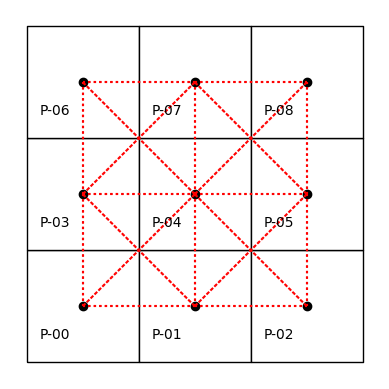

In [30]:
# Set up figure
f,ax = plt.subplots(1,1, subplot_kw=dict(aspect='equal'))
# Plot grid
gdf.plot(facecolor='w', edgecolor='k', ax=ax)
# Loop over each cell and add the text
for x, y, t in zip(
    [p.centroid.x-.25 for p in polys],
    [p.centroid.y-.25 for p in polys],
    [i for i in gdf['id']]
):
    plt.text(
        x, y, t, verticalalignment='center', horizontalalignment='center'
    )
# Plot weights connectivity
w_queen.plot(gdf, edge_kws=dict(color='r', linestyle=':'), ax =ax)
# Remove axes
ax.set_axis_off()

### KNN

In [31]:
w_knn = weights.KNN.from_dataframe(gdf, k=3)

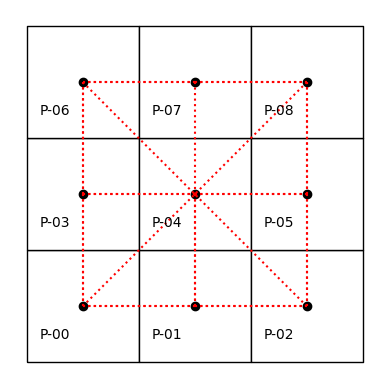

In [32]:
# Set up figure
f,ax = plt.subplots(1,1, subplot_kw=dict(aspect='equal'))
# Plot grid
gdf.plot(facecolor='w', edgecolor='k', ax=ax)
# Loop over each cell and add the text
for x, y, t in zip(
    [p.centroid.x-.25 for p in polys],
    [p.centroid.y-.25 for p in polys],
    [i for i in gdf['id']]
):
    plt.text(
        x, y, t, verticalalignment='center', horizontalalignment='center'
    )
# Plot weights connectivity
w_knn.plot(gdf, edge_kws=dict(color='r', linestyle=':'), ax =ax)
# Remove axes
ax.set_axis_off()

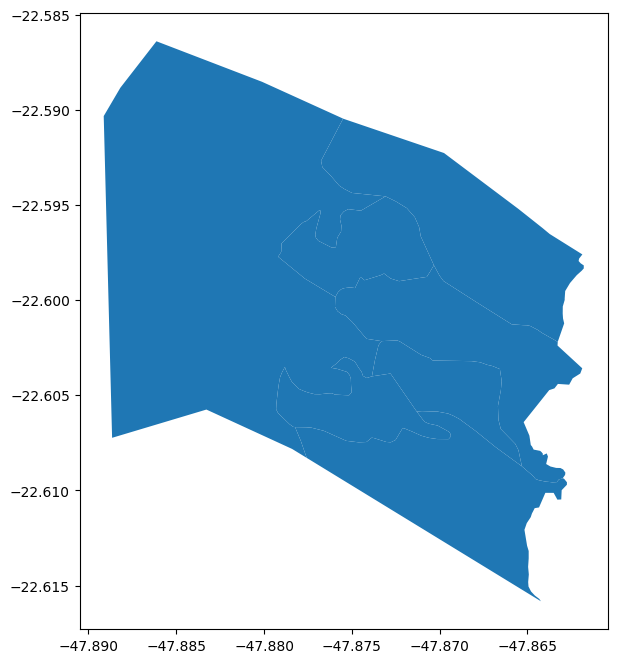

In [33]:
aguas_sao_pedro = setores_censitarios_sp.query(
    "NM_MUNICIP == 'ÁGUAS DE SÃO PEDRO' and TIPO =='URBANO'"
)
aguas_sao_pedro.reset_index(drop=True, inplace=True)
aguas_sao_pedro.plot(figsize=(16,8));

In [34]:
w_queen = weights.contiguity.Queen.from_dataframe(aguas_sao_pedro)
w_rook = weights.contiguity.Rook.from_dataframe(aguas_sao_pedro)
w_knn = weights.distance.KNN.from_dataframe(aguas_sao_pedro, k=4)

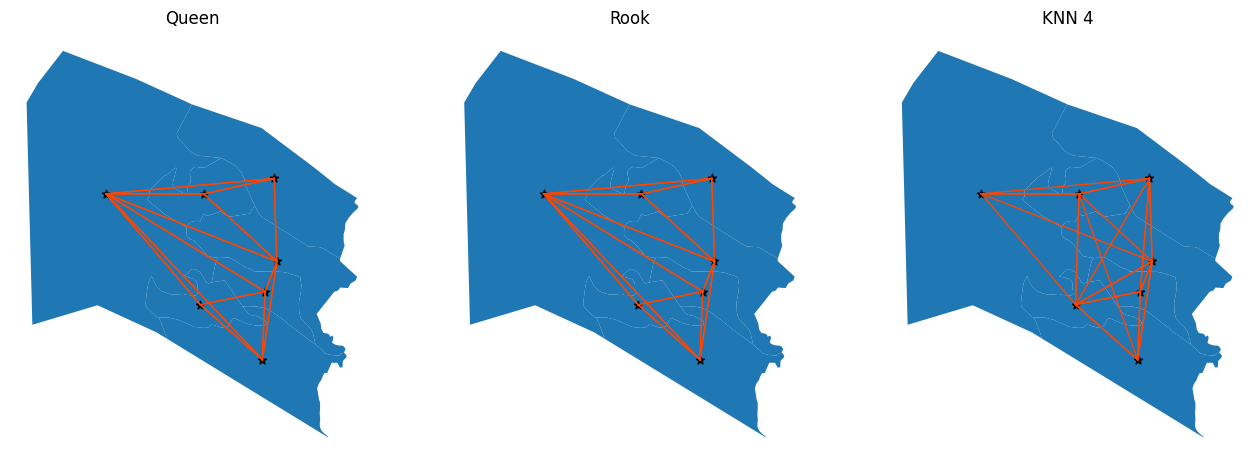

In [35]:
# Set up figure and axis
f, axs = plt.subplots(1, 3, figsize=(16, 10))

# Queen
ax = axs[0]
aguas_sao_pedro.plot(ax=ax)
w_queen.plot(
    aguas_sao_pedro, 
    edge_kws=dict(linewidth=1, color='orangered'), 
    node_kws=dict(marker='*'), 
    ax=ax
)
ax.set_axis_off()
ax.set_title('Queen')

# Rook
ax = axs[1]
aguas_sao_pedro.plot(ax=ax)
w_rook.plot(
    aguas_sao_pedro, 
    edge_kws=dict(linewidth=1, color='orangered'), 
    node_kws=dict(marker='*'), 
    ax=ax
)
ax.set_axis_off()
ax.set_title('Rook')

# Contiguity
ax = axs[2]
aguas_sao_pedro.plot(ax=ax)
w_knn.plot(
    aguas_sao_pedro, 
    edge_kws=dict(linewidth=1, color='orangered'), 
    node_kws=dict(marker='*'), 
    ax=ax
)
ax.set_axis_off()
ax.set_title('KNN 4');

## Mapas coropléticos

In [36]:
import mapclassify
np.random.seed(42)

In [37]:
dengue_sc = gpd.read_file(
    os.path.join(data_path, 'casos_dengue_2019_sao_carlos.geojson')
)
dengue_sc.head(2)

,CD_GEOCODI,dengue-2019,geometry
0,605000001,7,"POLYGON ((-47.89169 -22.01692, -47.89174 -22.0..."
1,605000002,15,"POLYGON ((-47.88857 -22.01972, -47.88861 -22.0..."


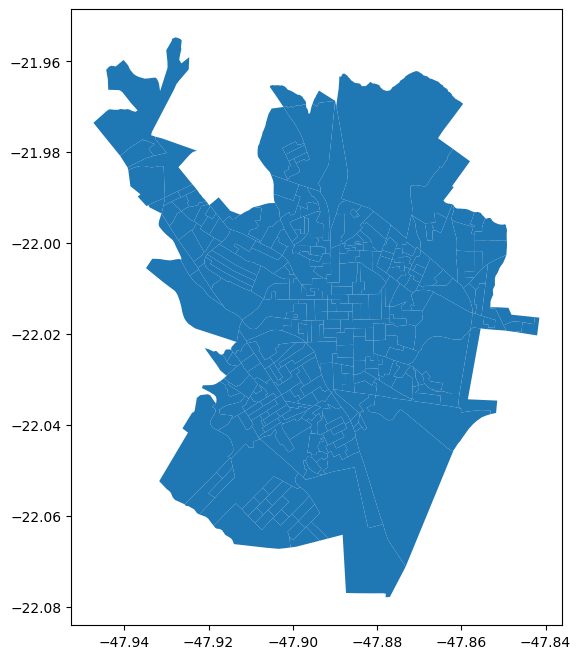

In [39]:
dengue_sc.plot(figsize=(16,8));

In [40]:
ei5 = mapclassify.EqualInterval(dengue_sc['dengue-2019'], k=5)
ei5

EqualInterval           

    Interval       Count
------------------------
[  0.00,  89.60] |   283
( 89.60, 179.20] |     3
(179.20, 268.80] |     0
(268.80, 358.40] |     0
(358.40, 448.00] |     1

In [41]:
q5 = mapclassify.Quantiles(dengue_sc['dengue-2019'], k=5)
q5

Quantiles               

    Interval       Count
------------------------
[  0.00,   7.00] |    60
(  7.00,  11.00] |    59
( 11.00,  16.00] |    54
( 16.00,  25.00] |    57
( 25.00, 448.00] |    57

In [42]:
msd = mapclassify.StdMean(dengue_sc['dengue-2019'])
msd

StdMean                 

    Interval       Count
------------------------
(  -inf, -42.17] |     0
(-42.17, -11.23] |     0
(-11.23,  50.65] |   274
( 50.65,  81.59] |     9
( 81.59, 448.00] |     4

In [43]:
bp = mapclassify.BoxPlot(dengue_sc['dengue-2019'])
bp

BoxPlot                 

    Interval       Count
------------------------
(  -inf, -13.00] |     0
(-13.00,   8.00] |    76
(  8.00,  14.00] |    72
( 14.00,  22.00] |    69
( 22.00,  43.00] |    52
( 43.00, 448.00] |    18

In [44]:
jc5 = mapclassify.JenksCaspall(dengue_sc['dengue-2019'], k=5)
jc5

JenksCaspall            

    Interval       Count
------------------------
[  0.00,   7.00] |    60
(  7.00,  13.00] |    77
( 13.00,  24.00] |    90
( 24.00,  46.00] |    44
( 46.00, 448.00] |    16

In [45]:
fj5 = mapclassify.FisherJenks(dengue_sc['dengue-2019'], k=5)
fj5

FisherJenks             

    Interval       Count
------------------------
[  0.00,  18.00] |   193
( 18.00,  40.00] |    74
( 40.00,  81.00] |    16
( 81.00, 152.00] |     3
(152.00, 448.00] |     1

### Comparando esquemas de classificação

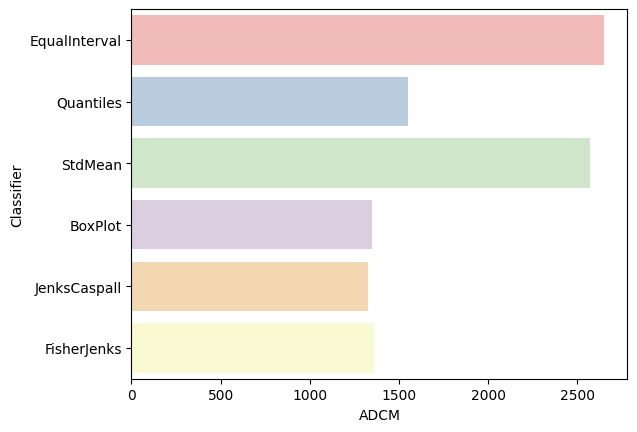

In [46]:
# Bunch classifier objects
class5 = ei5, q5, msd, bp, jc5, fj5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']

ax = sns.barplot(
    y='Classifier', x='ADCM', data=adcms, palette='Pastel1'
)

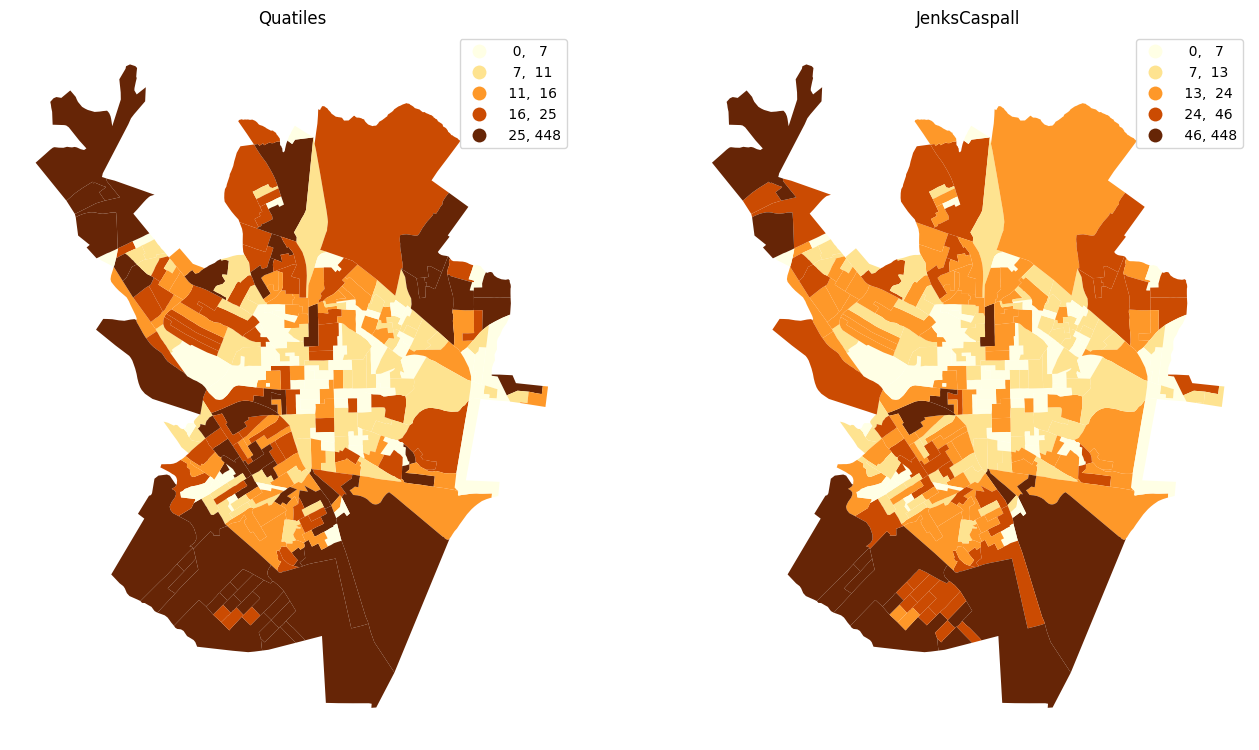

In [47]:
f, axs = plt.subplots(1, 2, figsize=(16, 10))

ax = axs[0]
dengue_sc.plot(
    figsize=(16,10),
    column='dengue-2019',
    scheme='Quantiles',
    cmap='YlOrBr',
    legend=True,
    legend_kwds={'fmt':'{:.0f}'},
    ax=ax
)
ax.set_axis_off()
ax.set_title('Quatiles')

ax = axs[1]
dengue_sc.plot(
    figsize=(16,10),
    column='dengue-2019',
    scheme='JenksCaspall',
    cmap='YlOrBr',
    legend=True,
    legend_kwds={'fmt':'{:.0f}'},
    ax=ax
)
ax.set_axis_off()
ax.set_title('JenksCaspall');

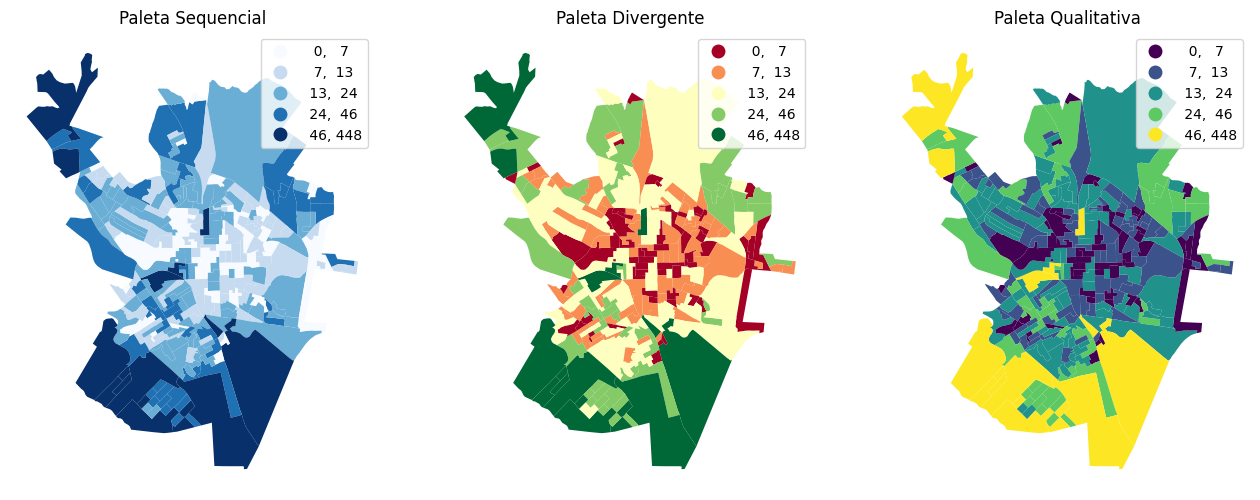

In [48]:
f, axs = plt.subplots(1, 3, figsize=(16, 10))

ax = axs[0]
dengue_sc.plot(
    column='dengue-2019',      
    scheme='JenksCaspall',       
    cmap='Blues',                 
    legend=True,                 
    legend_kwds={'fmt':'{:.0f}'},
    ax=ax
)
ax.set_axis_off();
ax.set_title('Paleta Sequencial')

ax = axs[1]
dengue_sc.plot(
    column='dengue-2019',      
    scheme='JenksCaspall',       
    cmap='RdYlGn',                 
    legend=True,                 
    legend_kwds={'fmt':'{:.0f}'},
    ax=ax
)
ax.set_axis_off();
ax.set_title('Paleta Divergente')

ax = axs[2]
dengue_sc.plot(
    column='dengue-2019',      
    scheme='JenksCaspall',          
    legend=True,                 
    legend_kwds={'fmt':'{:.0f}'},
    ax=ax
)
ax.set_axis_off();
ax.set_title('Paleta Qualitativa');

## Autocorrelação Espacial Global

In [49]:
from pysal.explore import esda
from pysal.viz import splot
from splot.esda import plot_moran

In [54]:
w = weights.contiguity.Queen.from_dataframe(dengue_sc)
w.transform='R'

In [55]:
moran_dengue_2019 = esda.moran.Moran(dengue_sc['dengue-2019'], w)
moran_dengue_2019.I

0.1660604998444799

In [56]:
moran_dengue_2019.p_sim

0.001

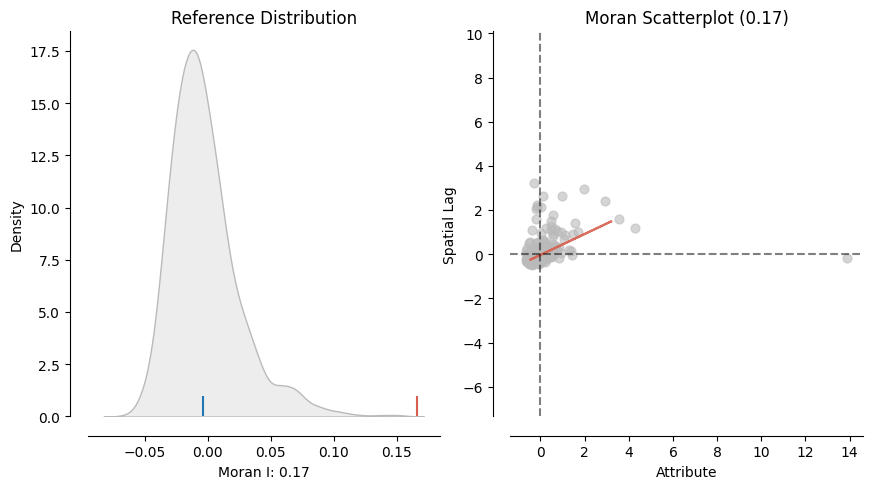

In [57]:
plot_moran(
    moran_dengue_2019, 
    zstandard=True, 
    figsize=(10,5)
);

In [58]:
geary = esda.geary.Geary(dengue_sc['dengue-2019'], w)
geary.C

0.9915727719278671

In [59]:
geary.p_sim

0.47

## Autocorrelação Espacial Local

In [60]:
from splot.esda import moran_scatterplot, lisa_cluster, plot_moran

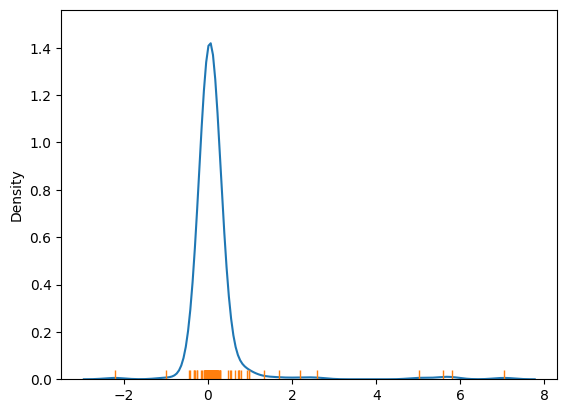

In [61]:
lisa = esda.moran.Moran_Local(dengue_sc['dengue-2019'], w)

# Draw KDE line
ax = sns.kdeplot(lisa.Is)
# Add one small bar (rug) for each observation
# along horizontal axis
sns.rugplot(lisa.Is, ax=ax);

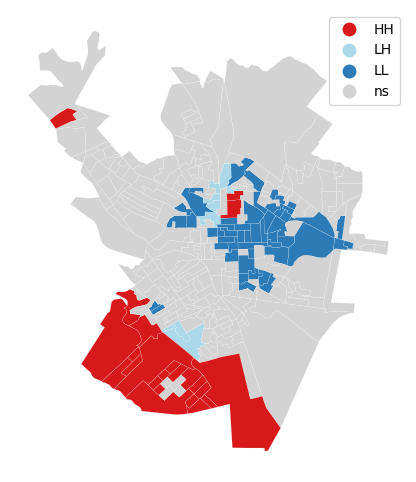

In [62]:
lisa_cluster(
    lisa,
    dengue_sc, 
    p=0.05,
    figsize=(6,6),
);

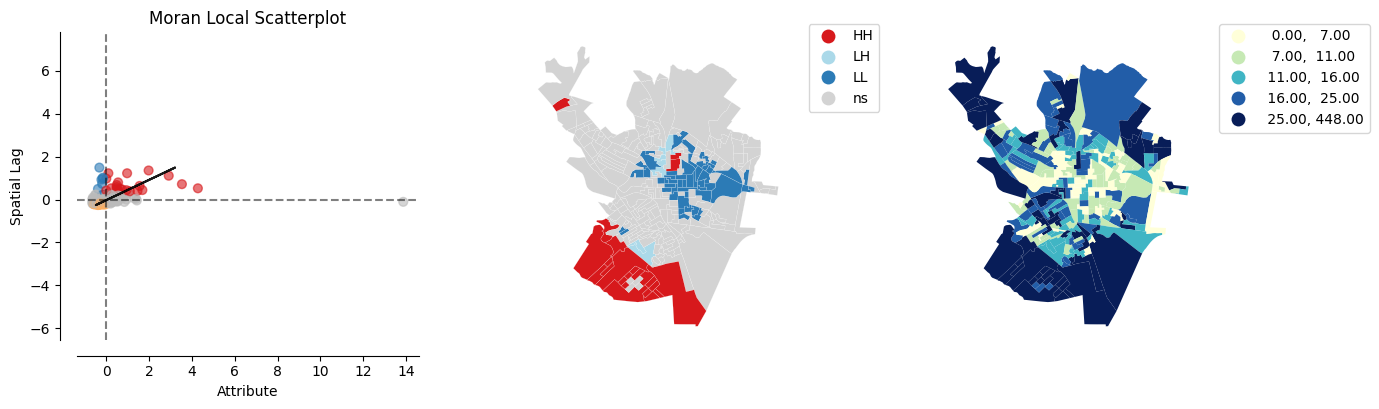

In [63]:
from splot.esda import plot_local_autocorrelation

plot_local_autocorrelation(
    lisa,
    dengue_sc, 
    'dengue-2019',
    p=0.05,
);

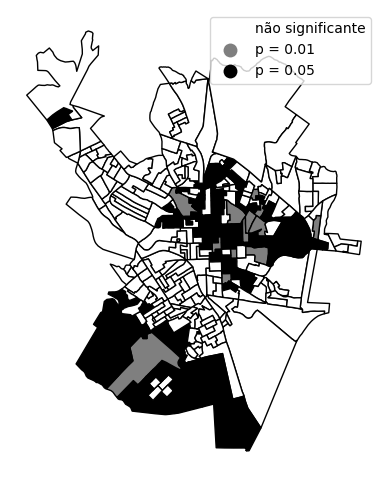

In [64]:
dengue_sc['LISA'] = 'não significante'
dengue_sc.loc[lisa.p_sim < 0.05, 'LISA'] = 'p = 0.05'
dengue_sc.loc[lisa.p_sim < 0.01, 'LISA'] = 'p = 0.01'

ax = dengue_sc.plot(
    figsize=(6,6),
    column='LISA',
    legend=True,
    edgecolor='black',
    cmap='gray_r',
)
ax.set_axis_off();

# Agradecimentos

---

![](github/agradecimentos.svg)

---